In [1]:
path_models = "./models/"
path_data = "./data/"

n_levels = 21 #number of considered height levels

# Minimum and maximum values in the training set:
pt_min = 276.74657877595683
pt_max = 329.4730806440175

q_min = 0.0
q_max = 0.019215934

In [2]:
import numpy as np
import xarray as xr
#import pickle5 as pickle
import pickle

from tensorflow.keras import models

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def normalize_to_interval(x, a, b, min_x=None, max_x=None):
    """
    Normalizes the data vector "x" to take values in the range [a, b].
    "min_x" and "max_x" correspond to the theoretically lowest or hightest value
    of "x", which might not actually be present in "x".
    Note that the highest (lowest) value in x will take the value of a (b) if
    "min_x" and/or "max_x" are not given.
    """
    
    if min_x is None:          
        min_x = np.min(x)
    if max_x is None:
        max_x = np.max(x)
                          
    return( (b - a) * ( x - min_x ) / ( max_x - min_x ) + a )

In [4]:
with open(path_data + "heights.pickle", "rb") as f:
        heights = pickle.load(f)
        
with open(path_data + "pottemps.pickle", "rb") as f:
        pottemps = pickle.load(f)
        
with open(path_data + "humids.pickle", "rb") as f:
        humids = pickle.load(f)
        
with open(path_data + "pblhs.pickle", "rb") as f:
        pblhs = pickle.load(f)

In [5]:
# Vectorize data:
n_samples = len(pblhs)
data = np.full([n_samples, n_levels, 2], np.nan)
targets = np.full(n_samples, -1)

for i in range(n_samples):
    data[i, :, 0] = pottemps[i][:n_levels]
    data[i, :, 1] = humids[i][:n_levels]
        
    targets[i] = np.where(pblhs[i] == heights[i])[0][0]
        
# Normalize data:
#train_data[:, 0:n_classes] = normalize_to_interval(train_data[:, 0:n_classes], 0., 1., 250., 350.)
data[:, :, 0] = normalize_to_interval(data[:, :, 0], 0., 1., pt_min, pt_max)
data[:, :, 1] = normalize_to_interval(data[:, :, 1], 0., 1., q_min, q_max)

In [6]:
with open(path_models + "covnet_combi.json", "r") as json_file:
    loaded_model_json = json_file.read()
    model = models.model_from_json(loaded_model_json)

model.load_weights(path_models + "covnet_weights_combi.h5")

2022-12-12 11:59:48.888316: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-12 11:59:48.889125: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [7]:
                  import numpy      as np
                  import netCDF4    as nc
from matplotlib   import pyplot     as plt
from scipy.signal import find_peaks as fp

## First Day Test

In [8]:
ds_1 = xr.open_dataset(path_data + "1_day.nc")
idx = [np.argmin(np.abs(height - ds_1["zt"].values)) for height in heights[0]]

In [9]:
# Vectorize data:
n_samples = ds_1.sizes["time"]
data = np.full([n_samples, n_levels, 2], np.nan)
targets = np.full(n_samples, -1)

for i in range(n_samples):
    data[i, :, 0] = ds_1["thv"][i][idx]
    data[i, :, 1] = ds_1["qt"][i][idx]
# Normalize data:
#train_data[:, 0:n_classes] = normalize_to_interval(train_data[:, 0:n_classes], 0., 1., 250., 350.)
data[:, :, 0] = normalize_to_interval(data[:, :, 0], 0., 1., pt_min, pt_max)
data[:, :, 1] = normalize_to_interval(data[:, :, 1], 0., 1., q_min, q_max)

In [10]:
nheights = np.empty((n_samples, n_levels))
for i in range(n_samples):
    nheights[i,:] = heights[0]

In [11]:
# Estimation:
est_ml = np.argmax(model.predict(data), axis=1)
est_pblh = [nheights[i_sample][i_est] for i_sample, i_est in enumerate(est_ml)]

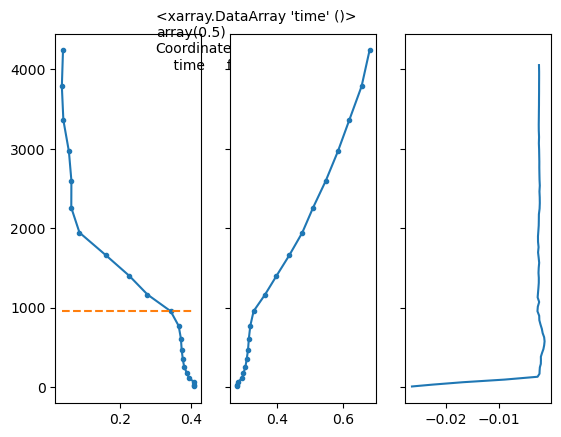

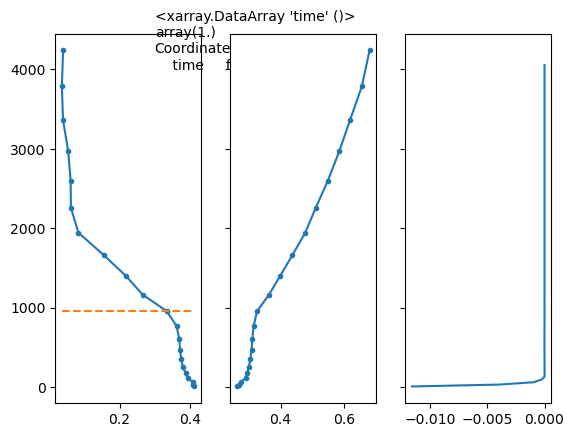

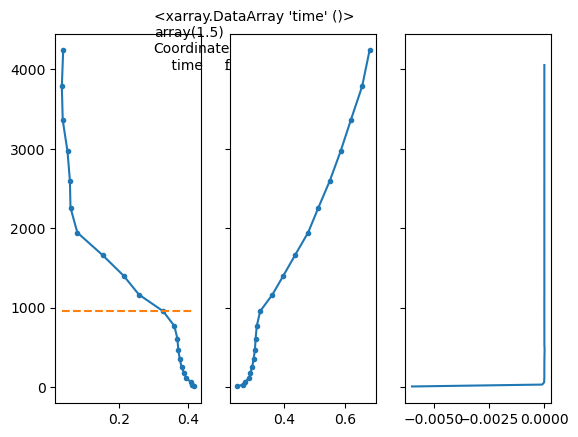

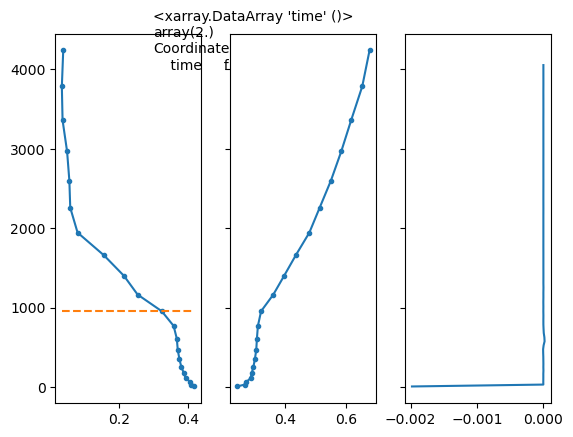

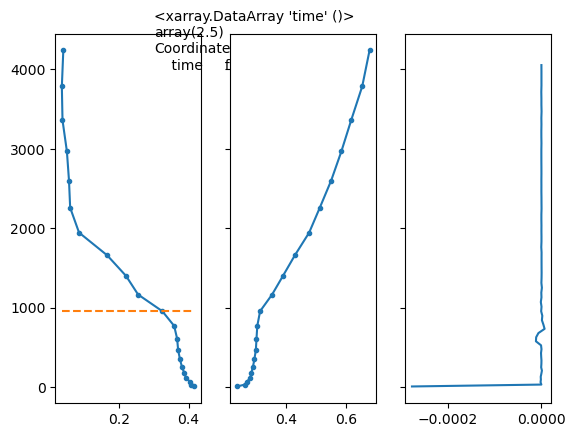

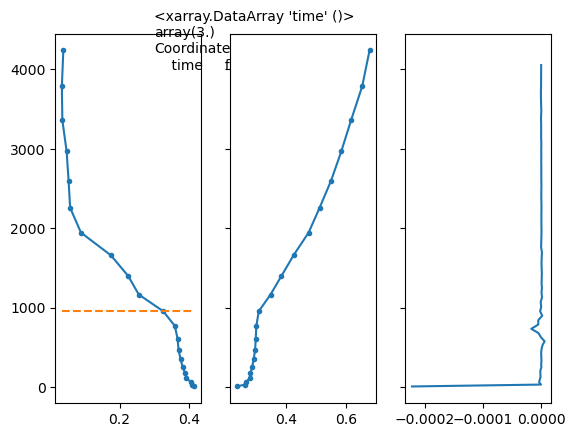

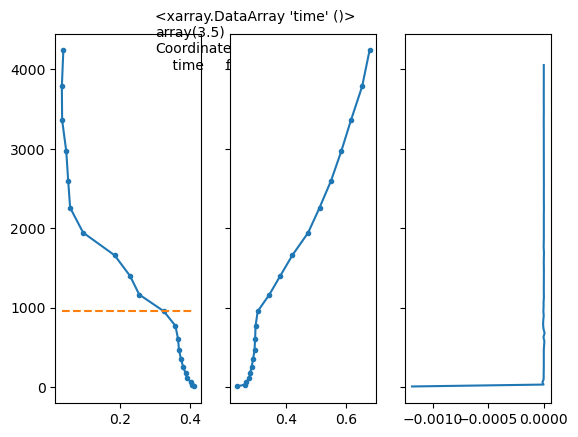

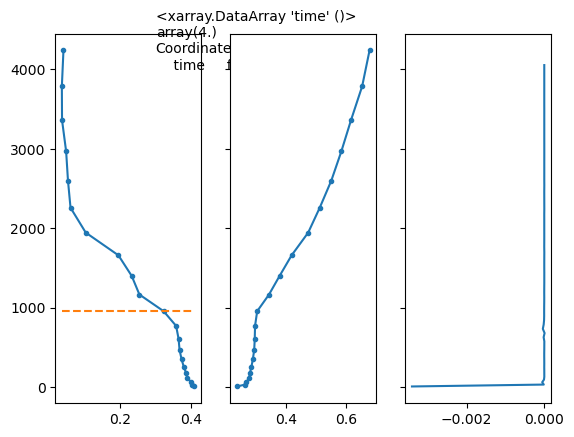

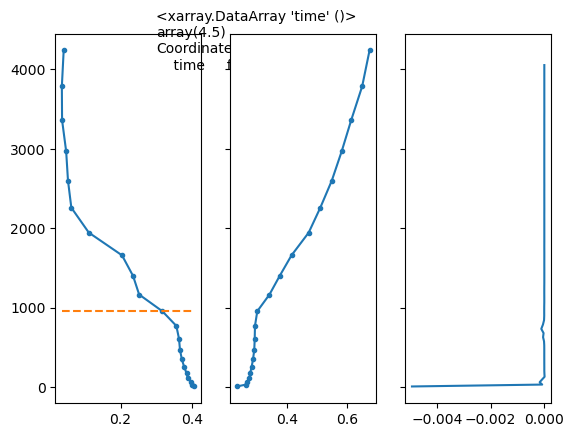

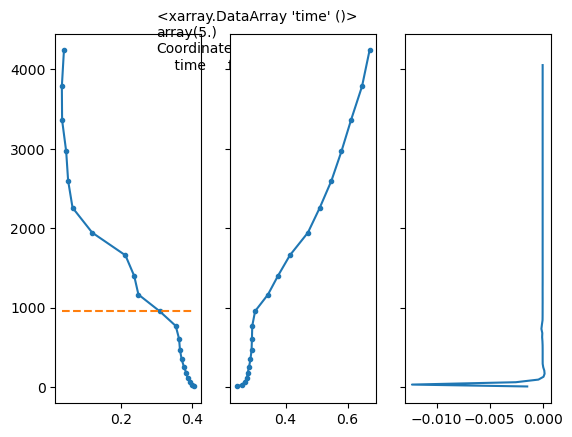

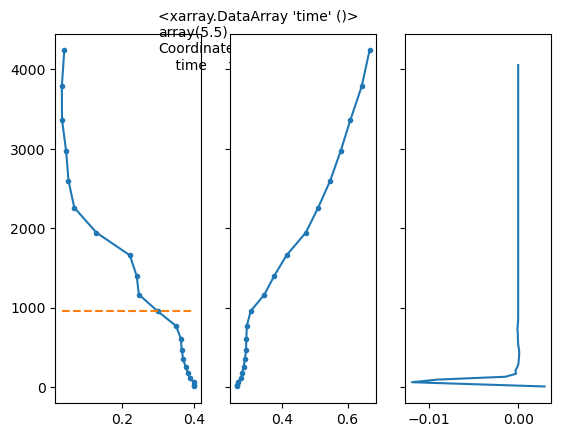

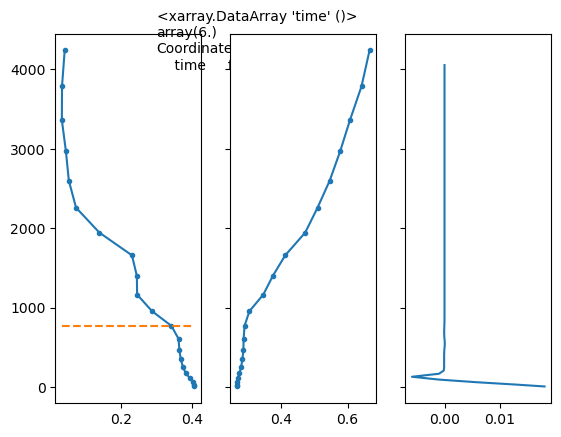

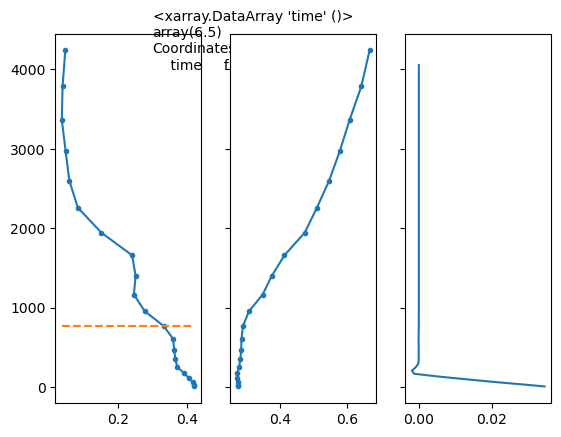

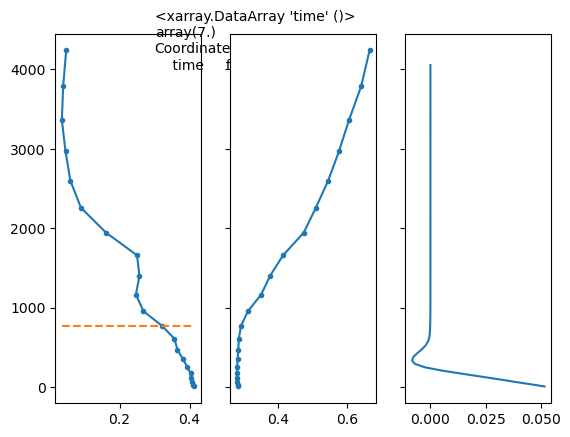

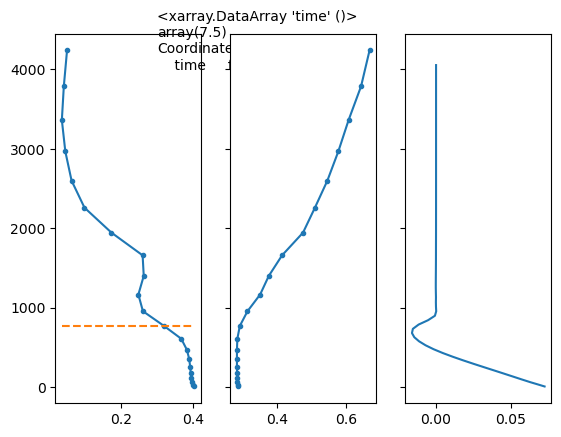

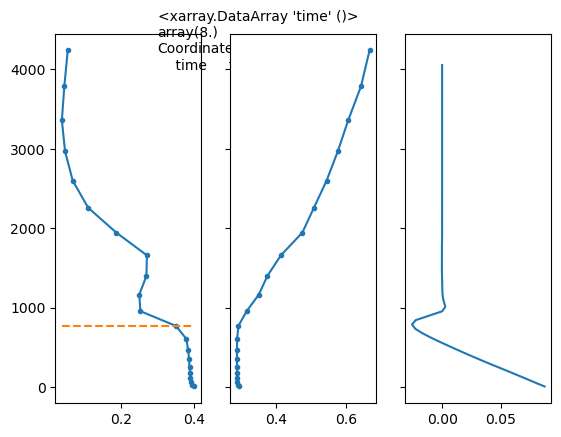

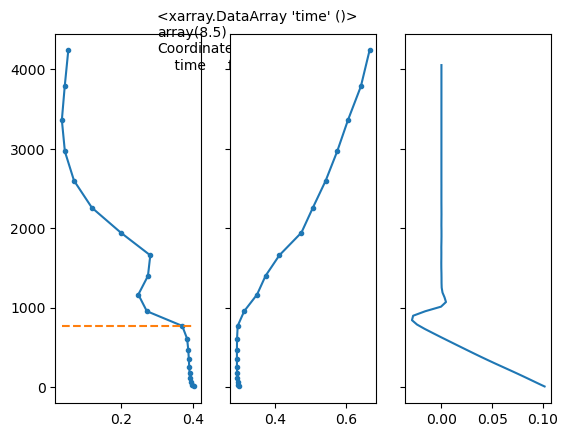

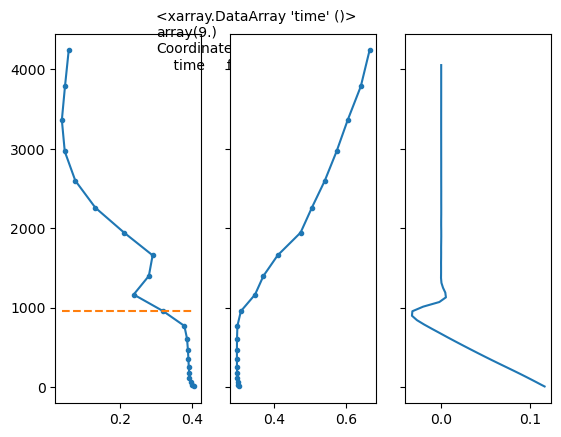

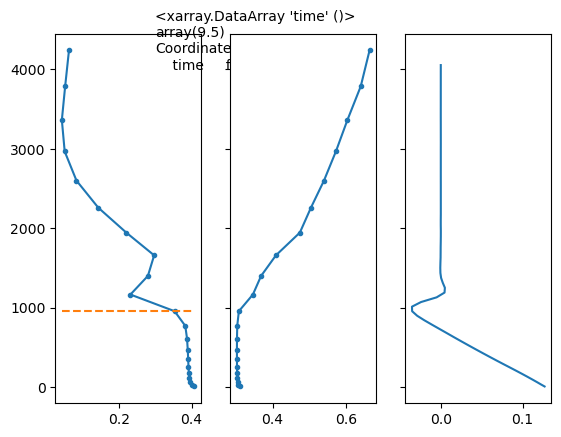

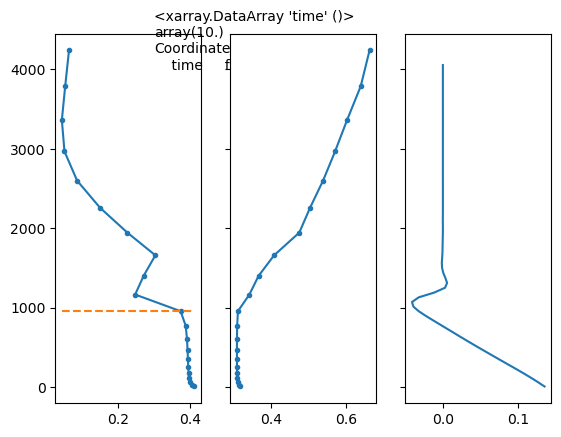

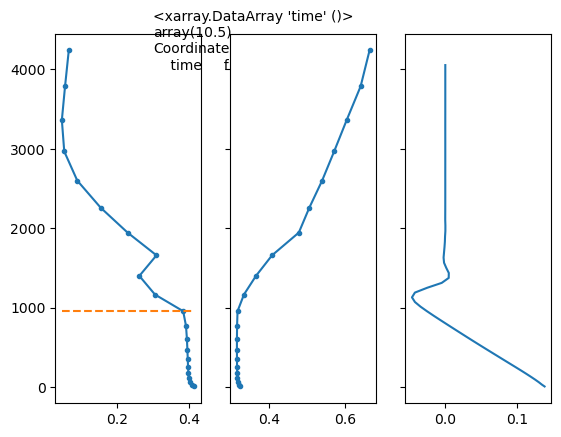

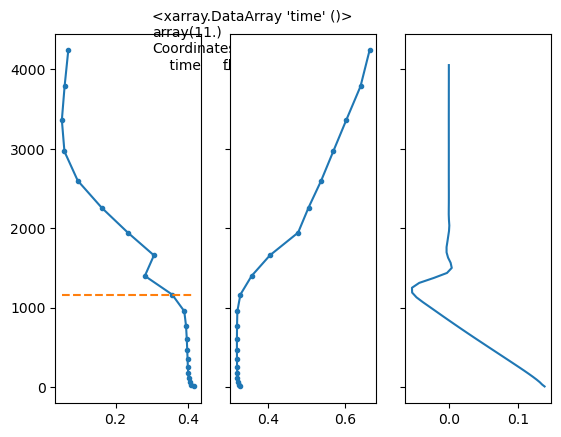

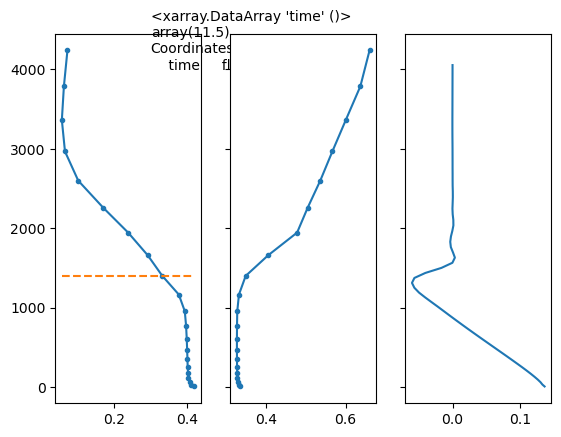

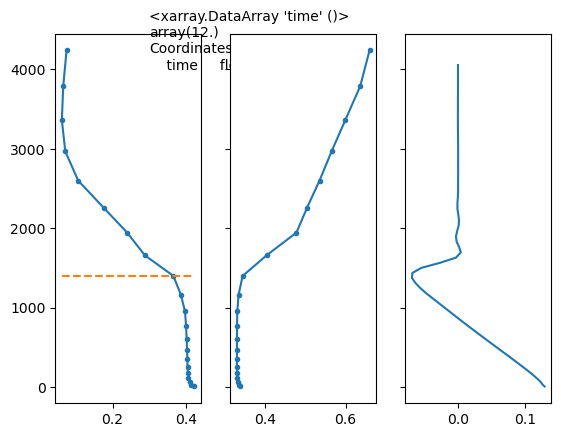

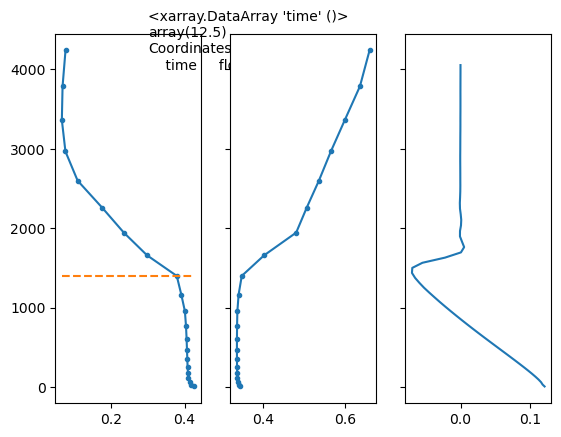

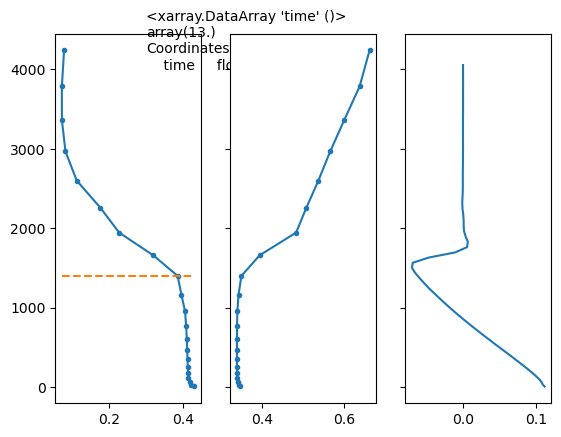

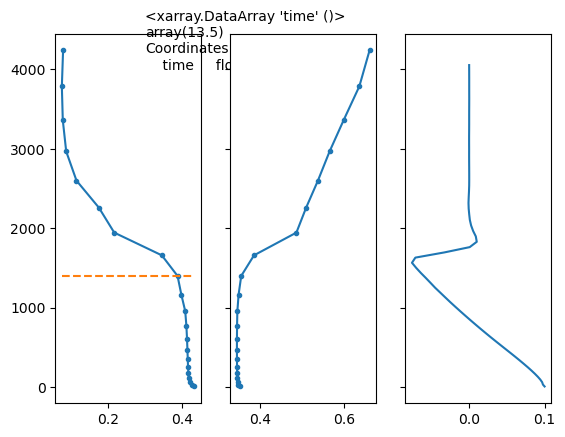

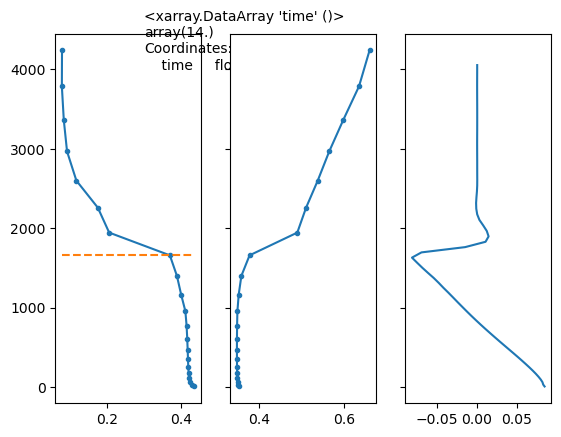

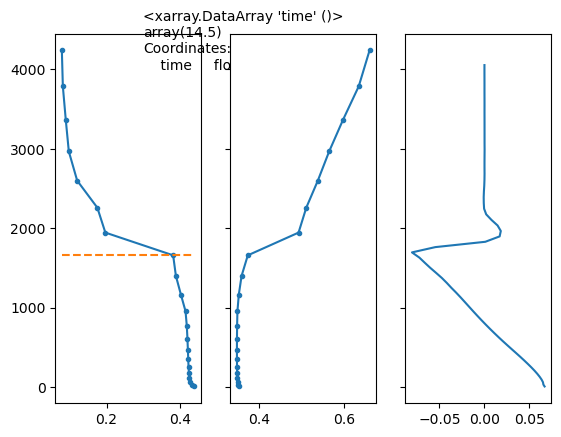

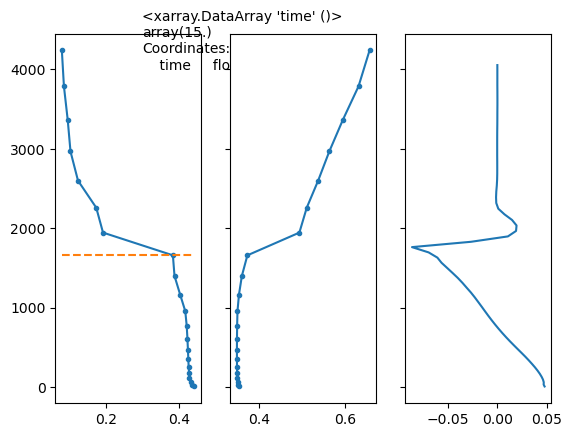

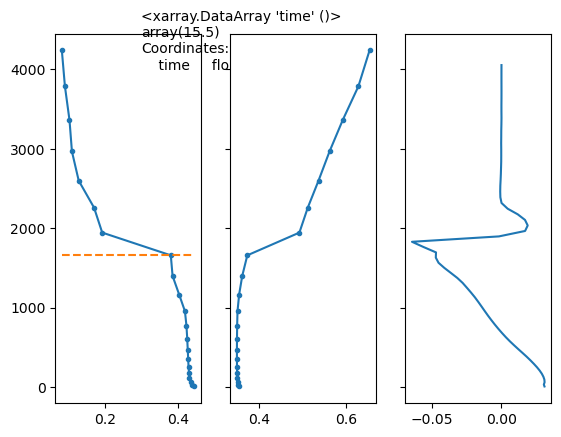

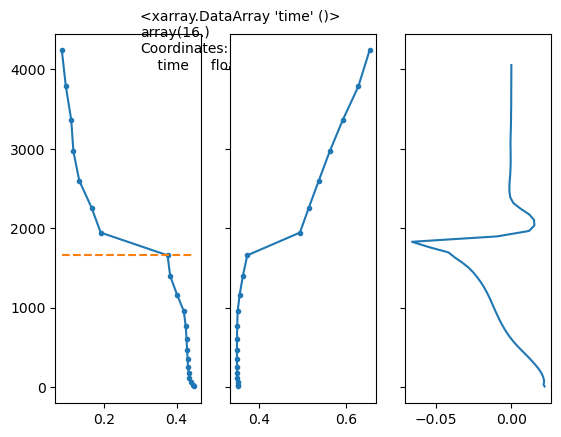

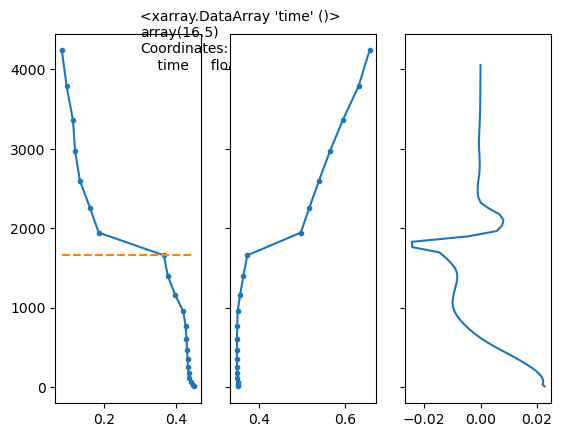

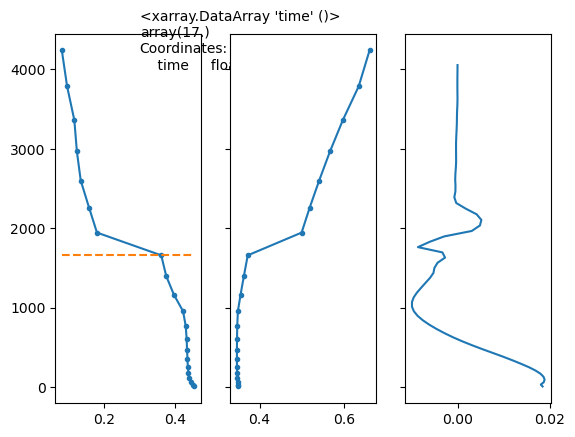

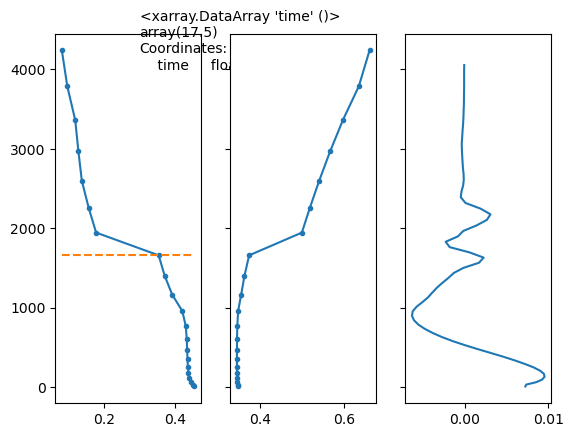

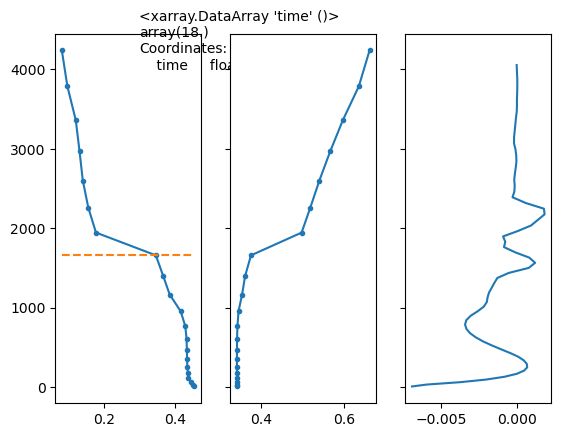

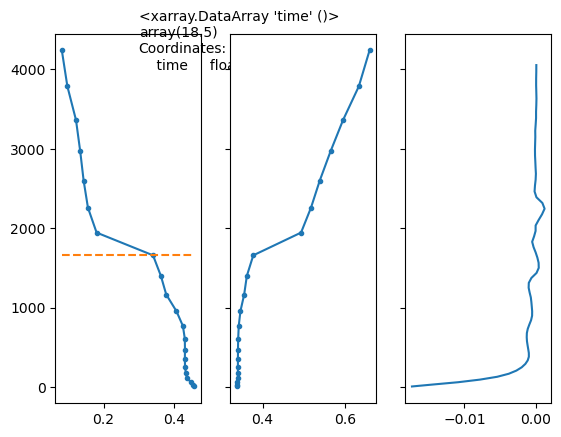

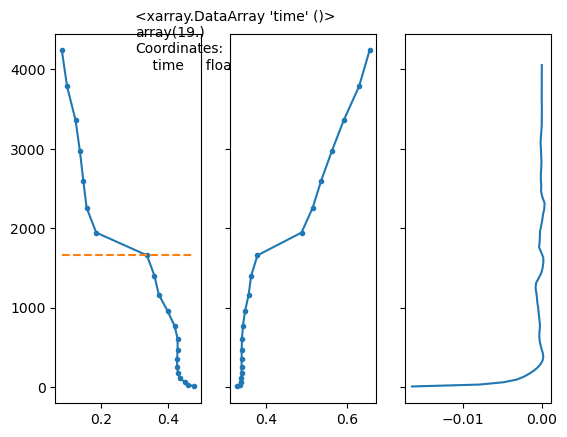

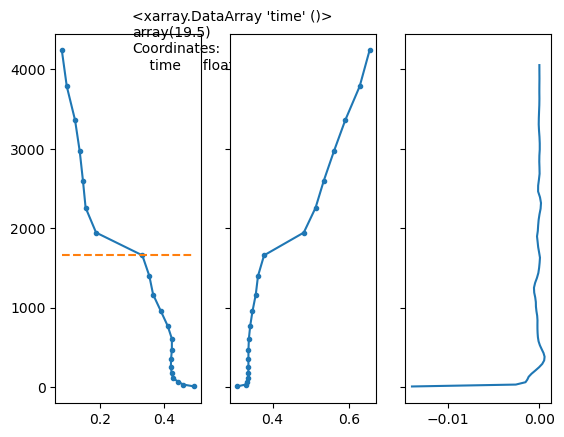

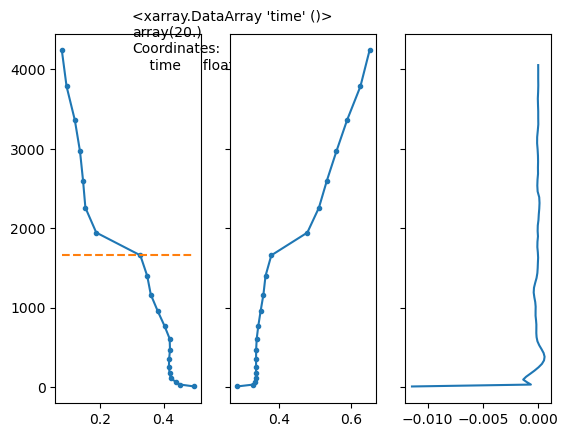

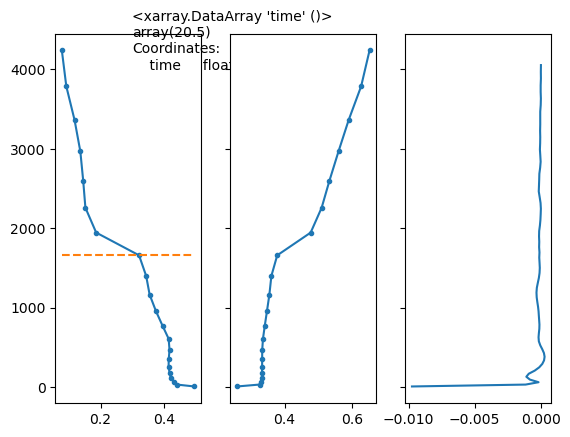

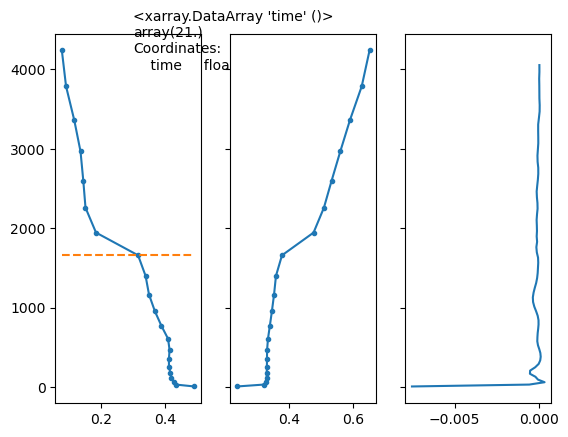

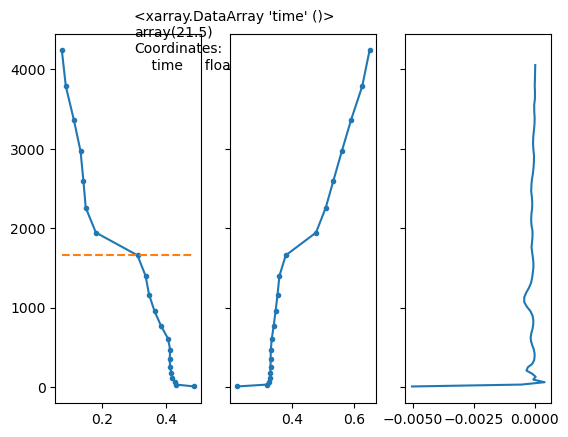

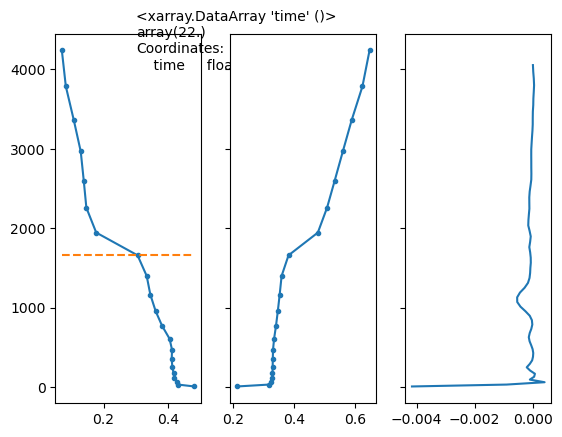

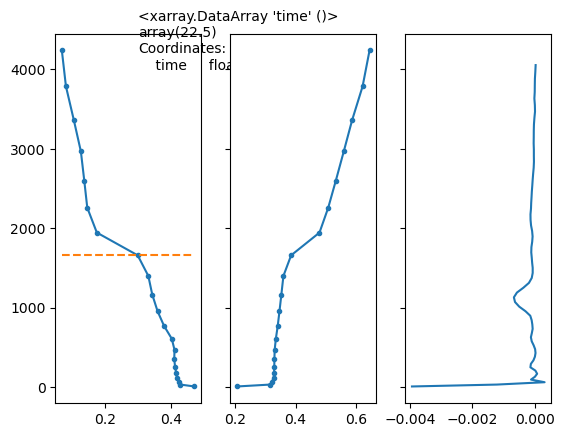

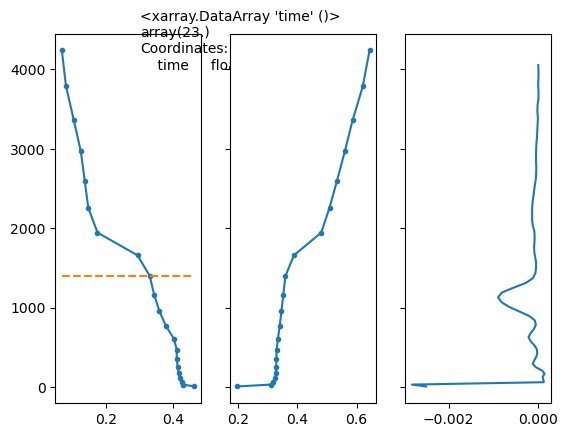

In [12]:
for i_sample in range(n_samples):
    fig, axs = plt.subplots(1, 3, sharey=True)

    example_height = nheights[i_sample]
    example_pt = data[i_sample,:,1]
    example_humid = data[i_sample,:,0]

    axs[0].plot(example_pt, example_height, marker=".")
    #axs[0].hlines(pblhs[i_sample], np.min(example_pt), np.max(example_pt), colors="tab:green")
    axs[0].hlines(est_pblh[i_sample], np.min(example_pt), np.max(example_pt), colors="tab:orange", linestyle="dashed")

    axs[0].text(0.3,4000,str(ds_1['time'][i_sample]/60/60))
    
    axs[1].plot(example_humid, example_height, marker=".")
    
    axs[2].plot(ds_1['wthlt'][i_sample,:65], ds_1['zt'][:65])

    plt.show()

## Second Day Test

In [13]:
ds_2 = xr.open_dataset(path_data + "2_day.nc")
idx = [np.argmin(np.abs(height - ds_1["zt"].values)) for height in heights[0]]

In [14]:
# Vectorize data:
n_samples = ds_2.sizes["time"]
data = np.full([n_samples, n_levels, 2], np.nan)
targets = np.full(n_samples, -1)

for i in range(n_samples):
    data[i, :, 0] = ds_2["thv"][i][idx]
    data[i, :, 1] = ds_2["qt"][i][idx]
# Normalize data:
#train_data[:, 0:n_classes] = normalize_to_interval(train_data[:, 0:n_classes], 0., 1., 250., 350.)
data[:, :, 0] = normalize_to_interval(data[:, :, 0], 0., 1., pt_min, pt_max)
data[:, :, 1] = normalize_to_interval(data[:, :, 1], 0., 1., q_min, q_max)

In [15]:
# Estimation:
est_ml = np.argmax(model.predict(data), axis=1)
est_pblh = [nheights[i_sample][i_est] for i_sample, i_est in enumerate(est_ml)]

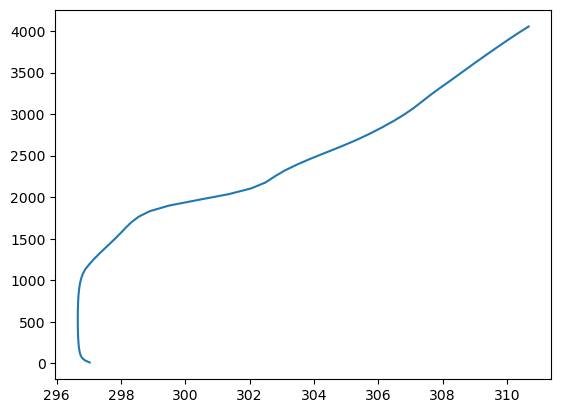

In [16]:
plt.plot(ds_2['thv'][23,:65], ds_2['zt'][:65])

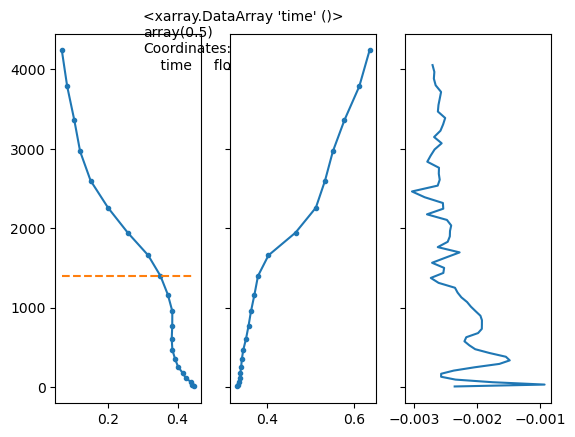

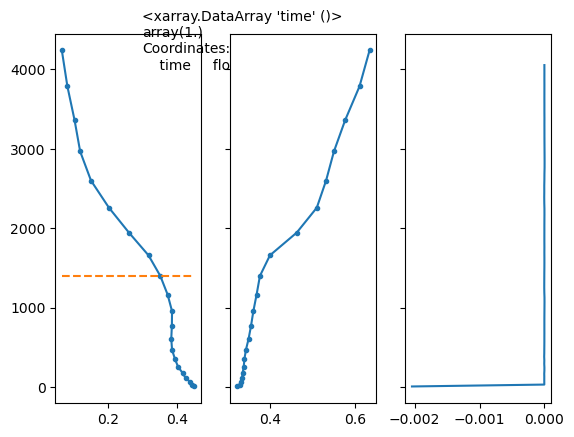

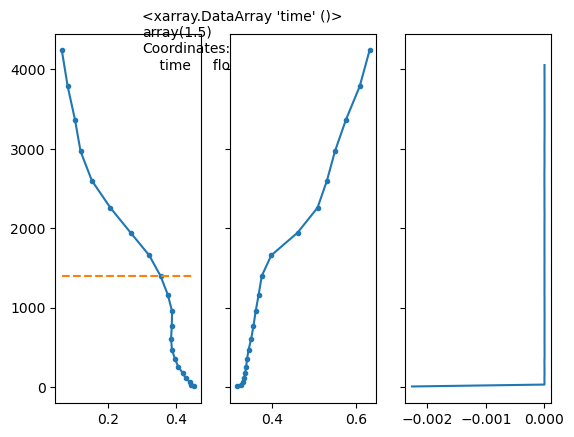

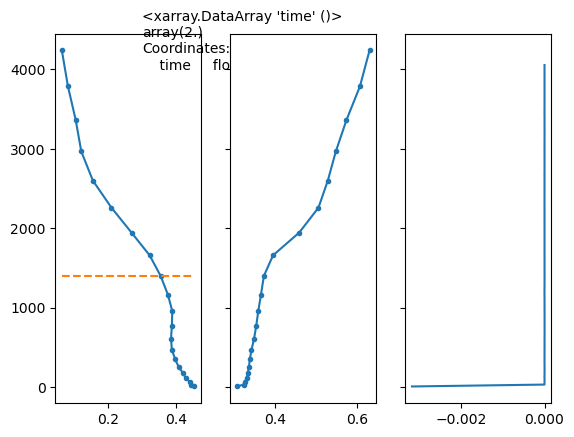

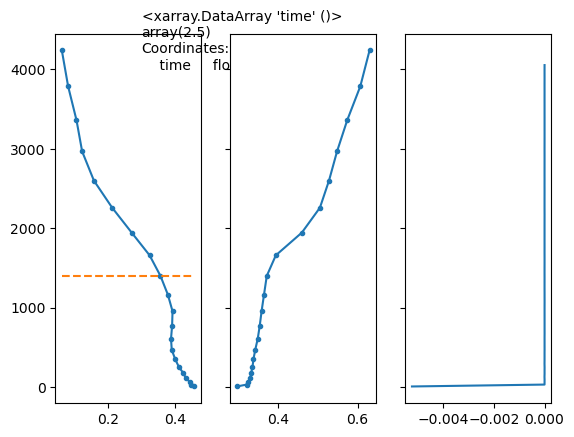

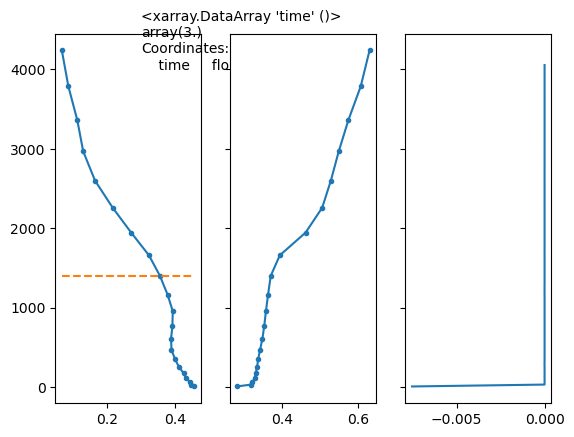

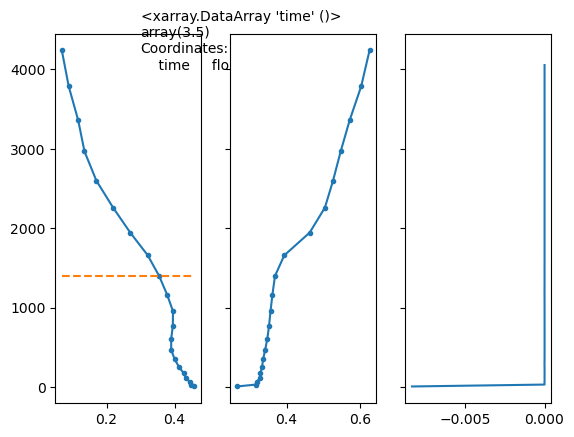

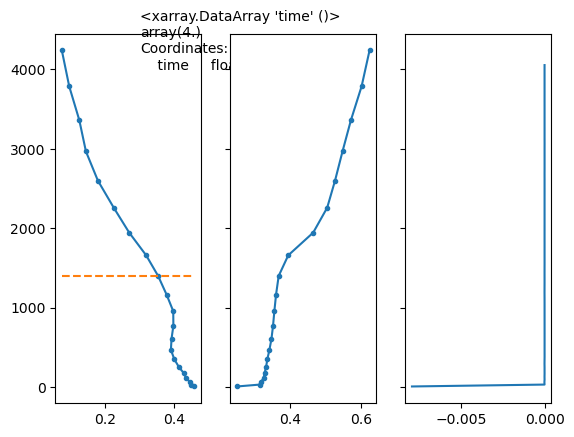

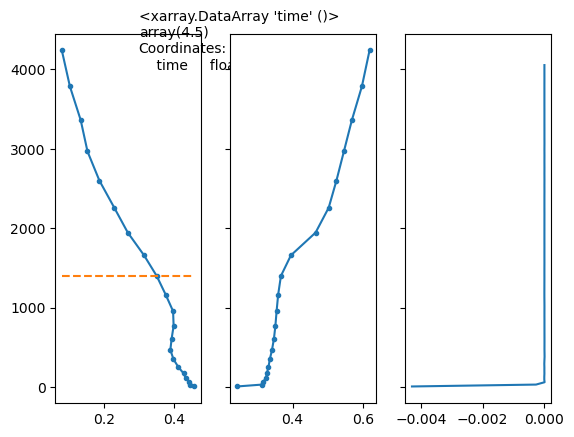

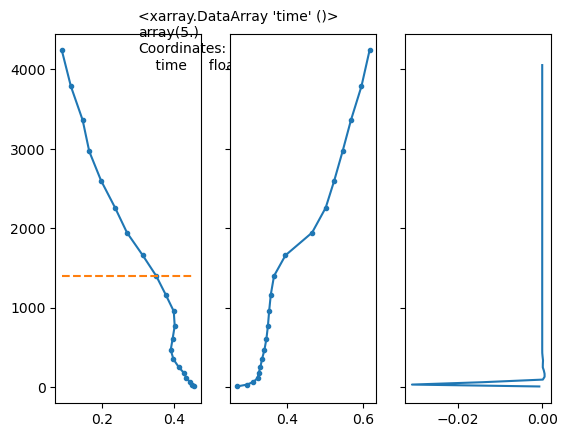

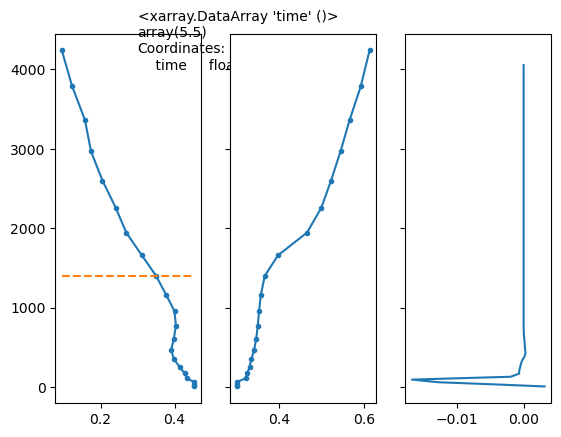

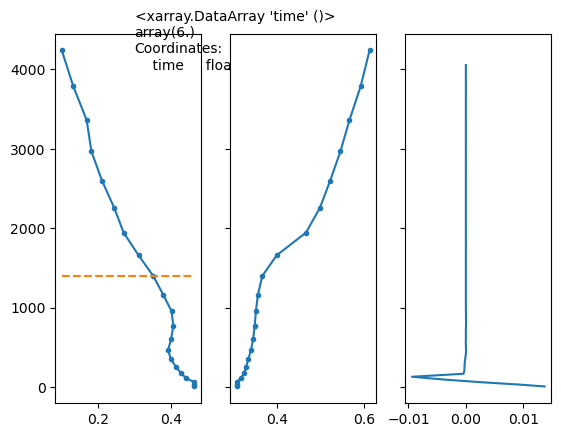

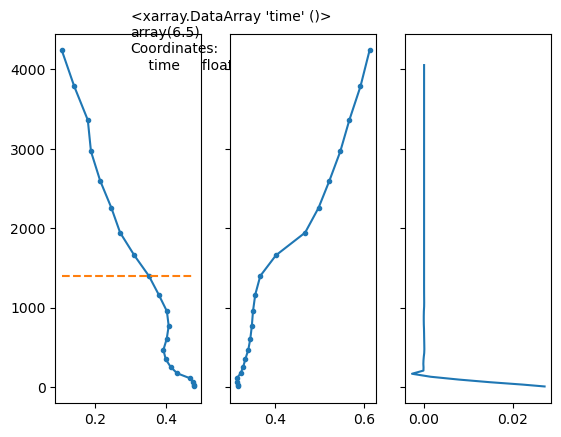

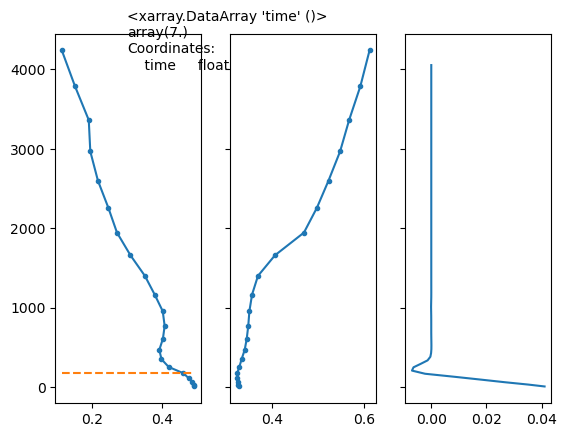

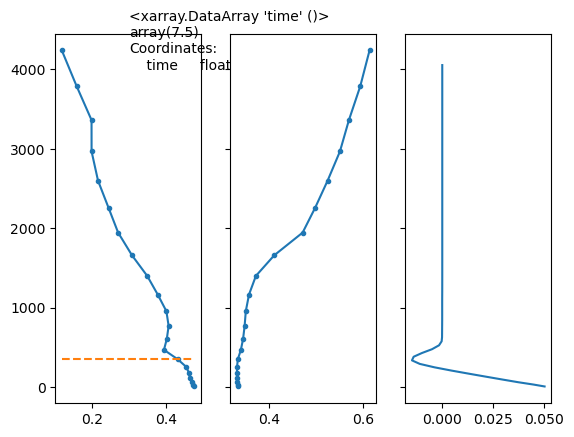

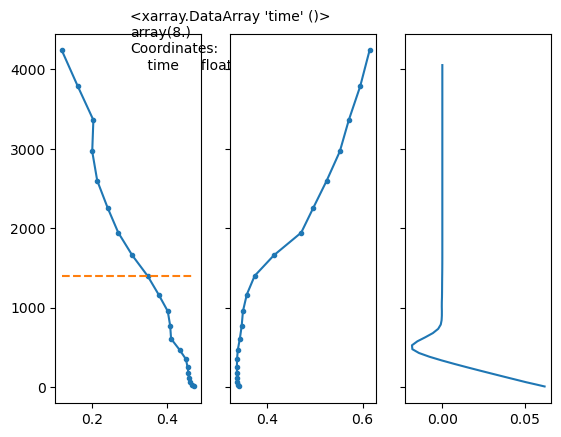

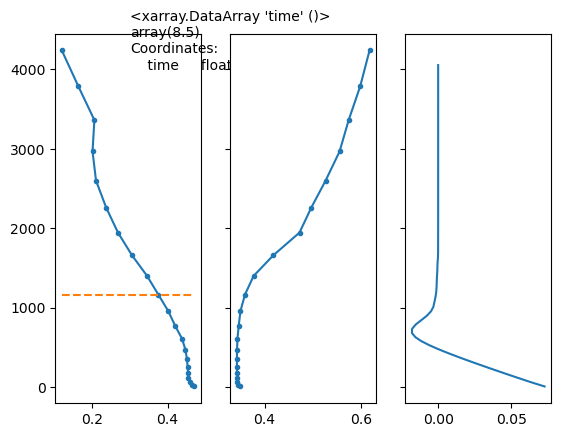

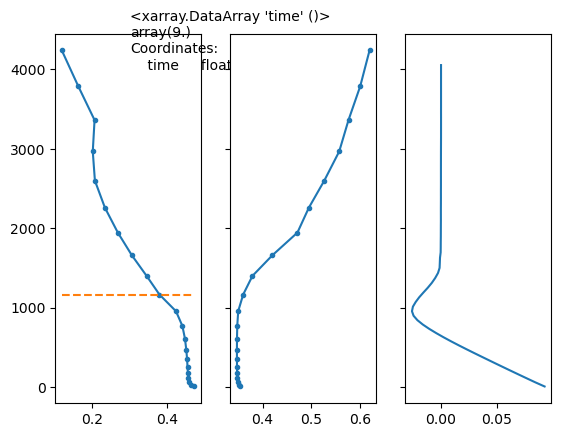

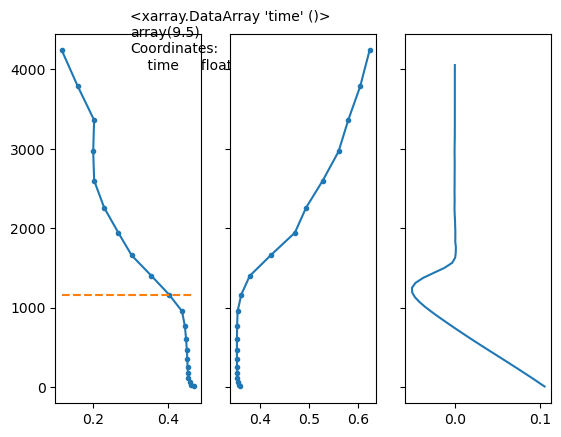

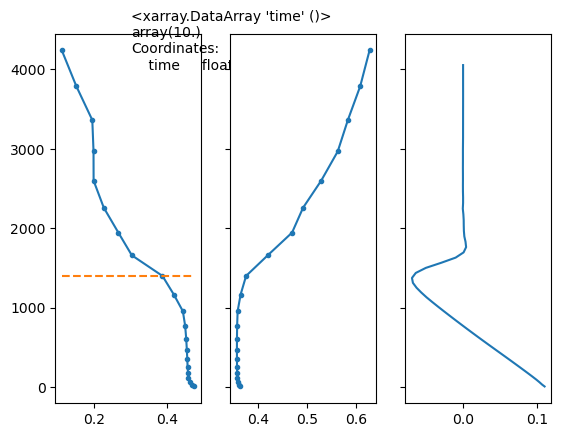

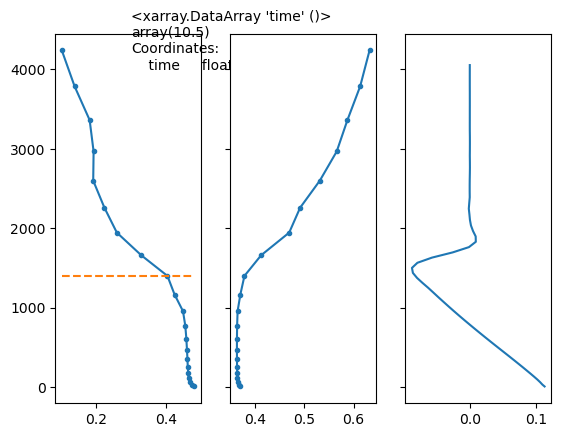

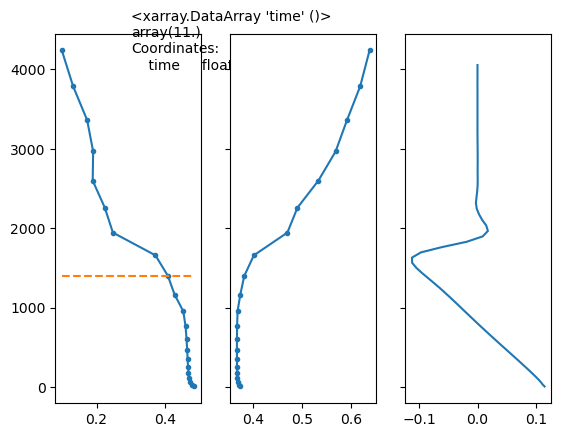

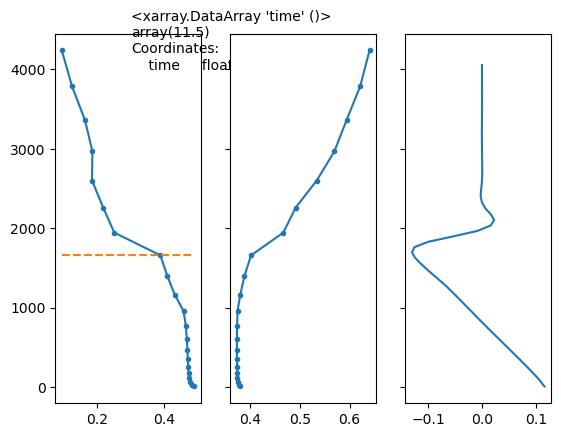

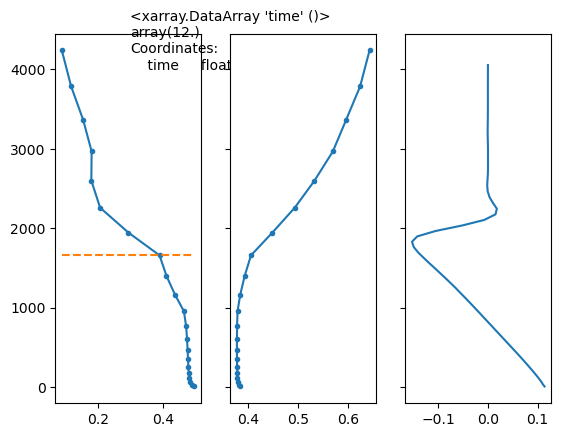

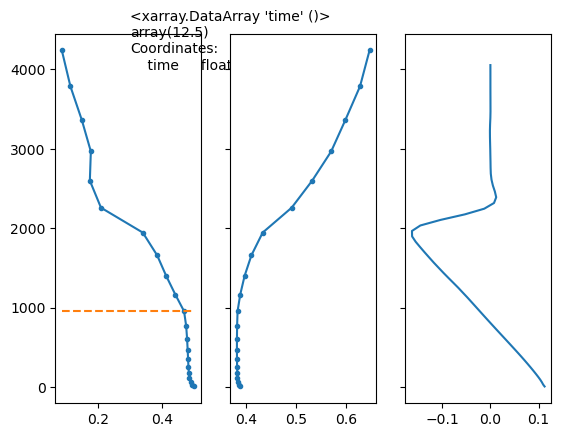

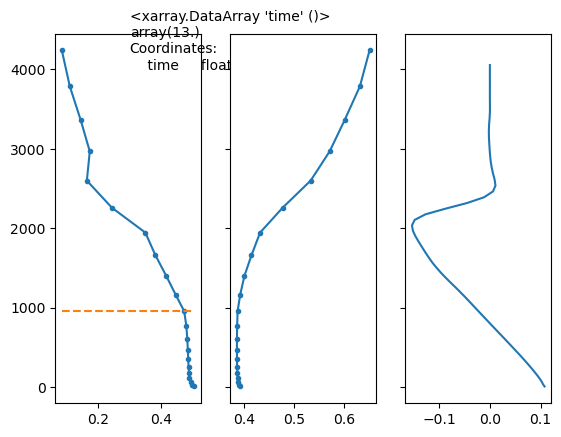

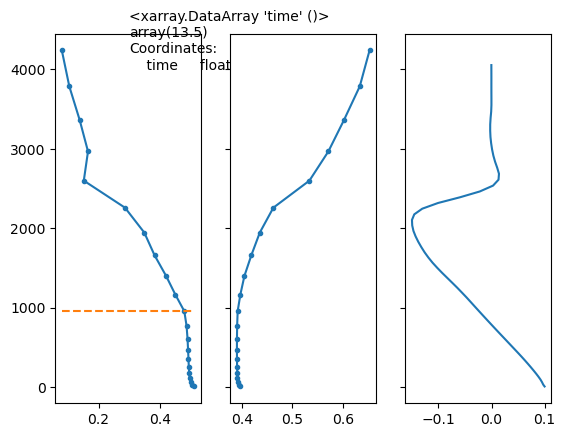

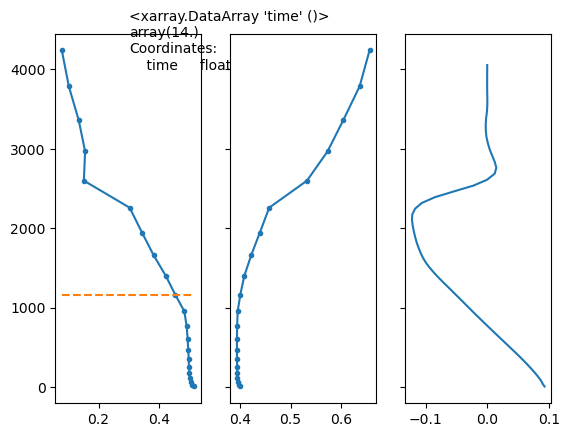

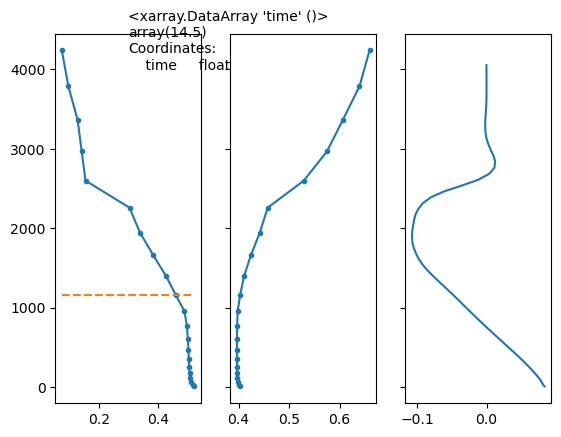

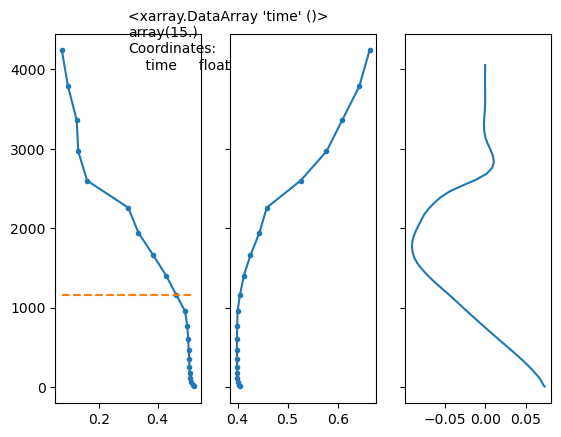

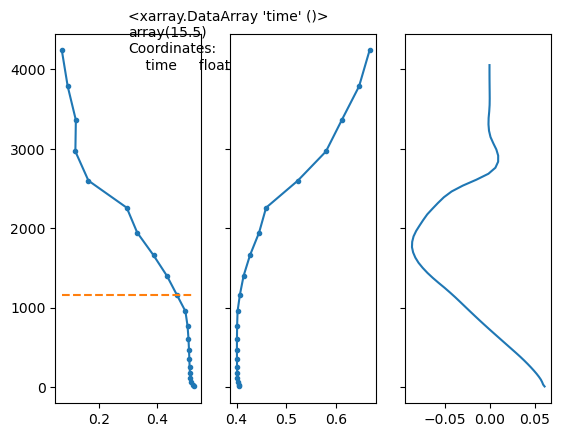

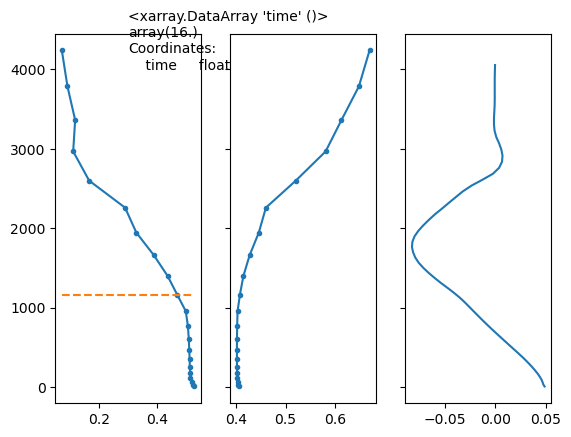

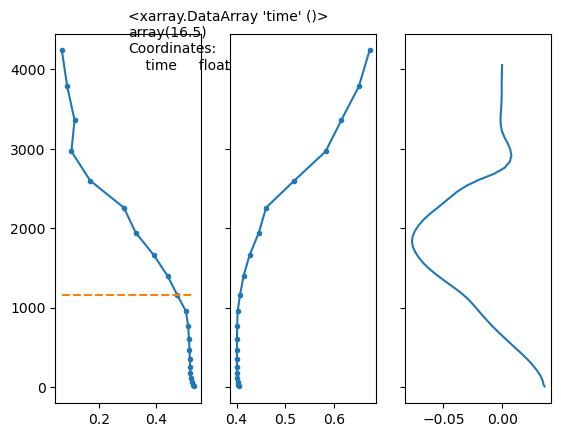

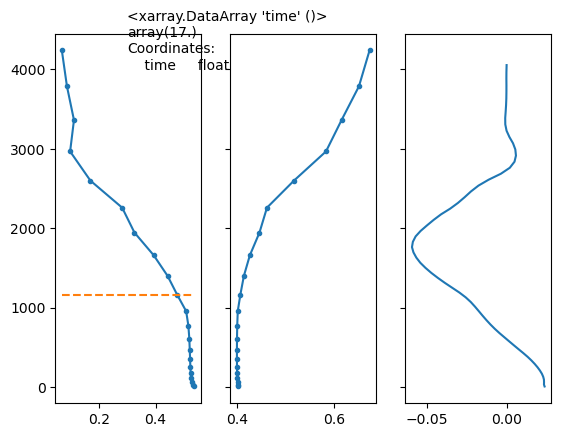

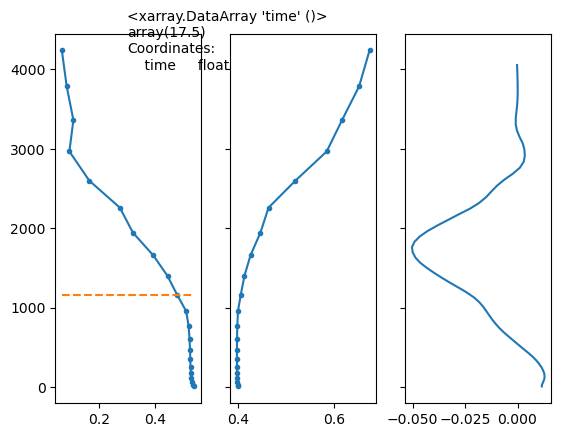

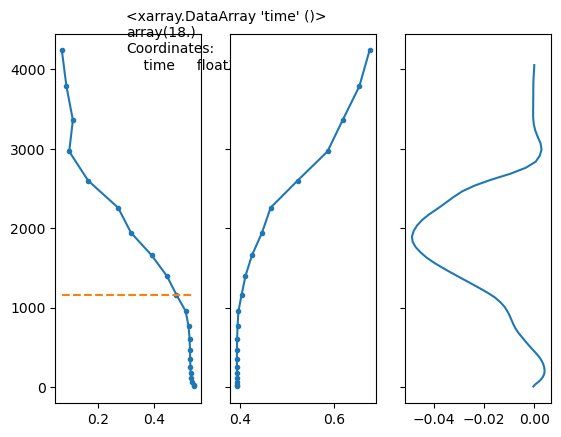

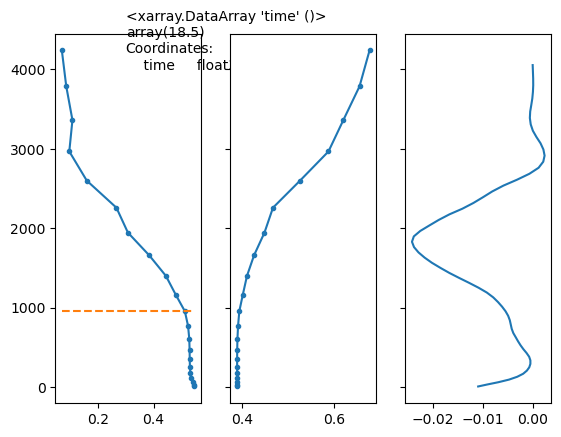

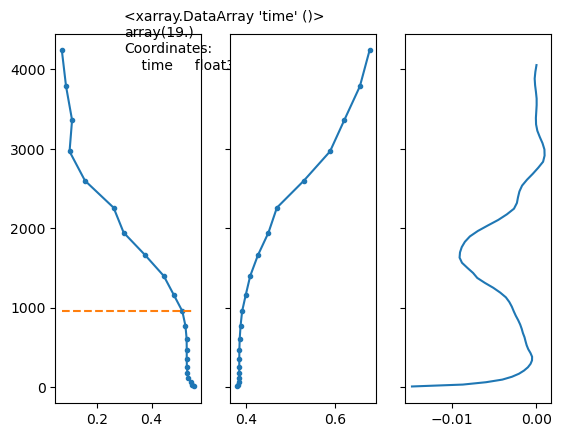

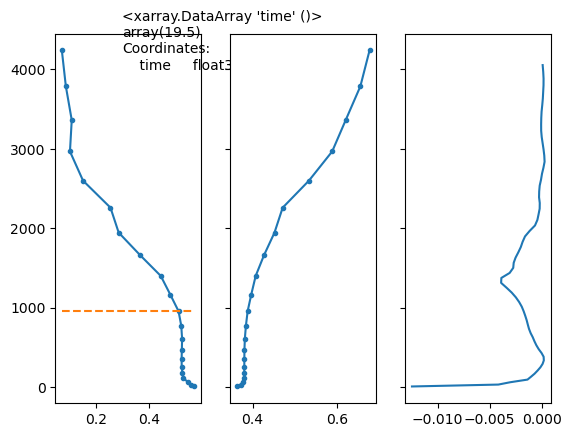

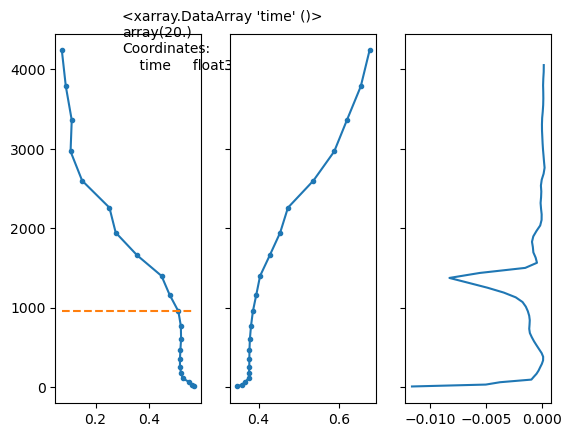

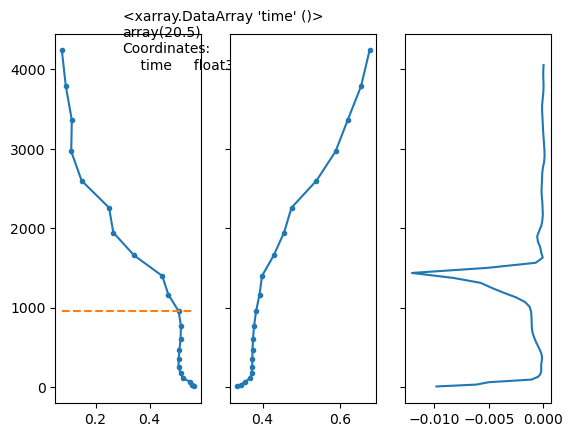

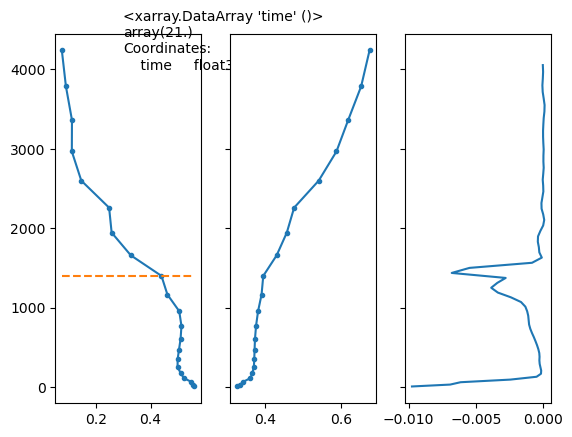

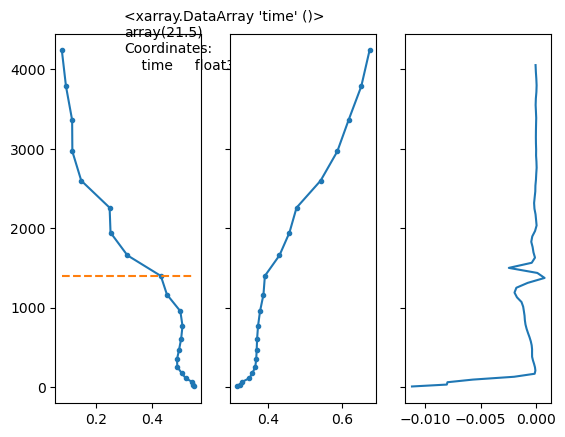

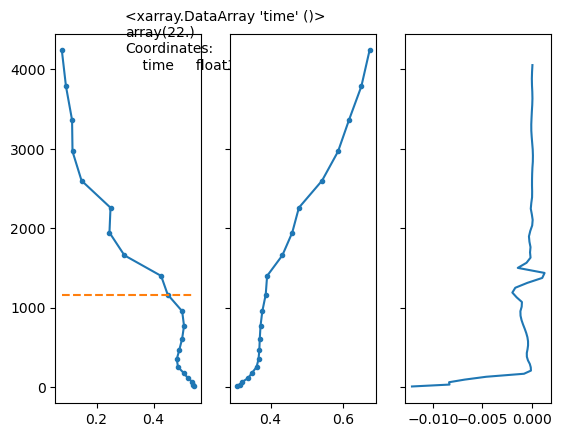

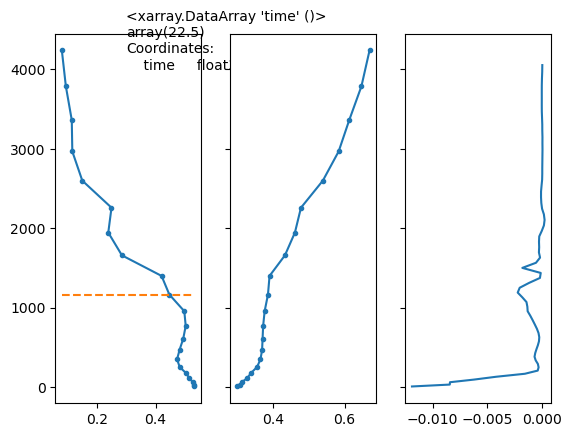

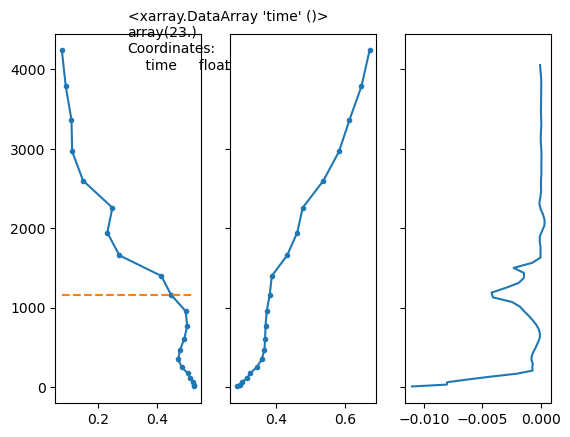

In [17]:
for i_sample in range(n_samples):
    fig, axs = plt.subplots(1, 3, sharey=True)

    example_height = nheights[i_sample]
    example_pt = data[i_sample,:,1]
    example_humid = data[i_sample,:,0]

    axs[0].plot(example_pt, example_height, marker=".")
    #axs[0].hlines(pblhs[i_sample], np.min(example_pt), np.max(example_pt), colors="tab:green")
    axs[0].hlines(est_pblh[i_sample], np.min(example_pt), np.max(example_pt), colors="tab:orange", linestyle="dashed")

    axs[0].text(0.3,4000,str(ds_2['time'][i_sample]/60/60))
    
    axs[1].plot(example_humid, example_height, marker=".")
    
    axs[2].plot(ds_2['wthlt'][i_sample,:65], ds_2['zt'][:65])

    plt.show()